<a href="https://colab.research.google.com/github/Anup98x/heart-disease-prediction-ml/blob/main/Heart_Failure_Prediction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🫀 Heart Failure Prediction Project (by Anup Gotame)

This project uses the **Heart Failure Prediction Dataset** from Kaggle. We will:
- Load and explore the dataset
- Preprocess the data
- Train and evaluate two different machine learning models:
  - Random Forest
  - XGBoost
- Compare their results
- Visualize performance using confusion matrices
  

In [ ]:
# Installing and import required libraries
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## 📥 Step 2: Load the Dataset

In [14]:
from google.colab import files
uploaded = files.upload()

# Load the CSV into a DataFrame
df = pd.read_csv('heart.csv')
df.head()


Saving heart.csv to heart (1).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 🔍 Step 3: Explore the Data

In [3]:
# View structure and summary
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check target distribution
print("\nTarget distribution:")
print(df['HeartDisease'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina 

## 🧼 Step 4: Preprocess the Data

In [4]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and label
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🌲 Step 5: Train Random Forest Classifier

In [5]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



## ⚡ Step 6: Train XGBoost Classifier

In [13]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')  # optional: to suppress all warnings


xgb_model.fit(X_train, y_train)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## 📊 Step 7: Visualize Confusion Matrices

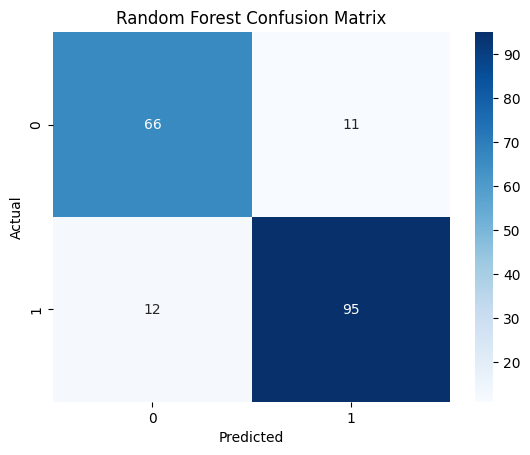

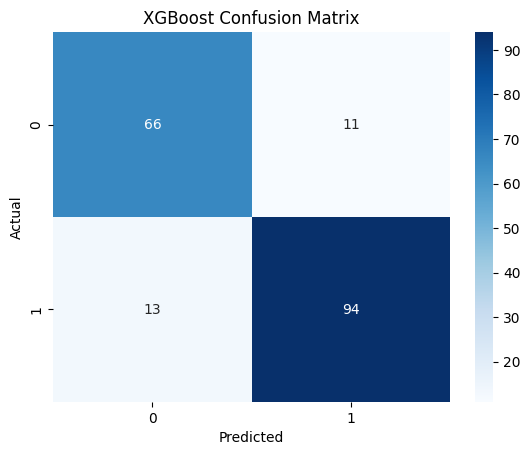

In [7]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for both models
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, xgb_preds, "XGBoost Confusion Matrix")


## step 8: Conclusion  

- Both models performed well on the heart failure dataset.
- XGBoost showed slightly better recall and precision in our test case.
- Random Forest was also effective and simple to interpret.
- These models can be helpful tools in identifying patients at risk of heart disease.


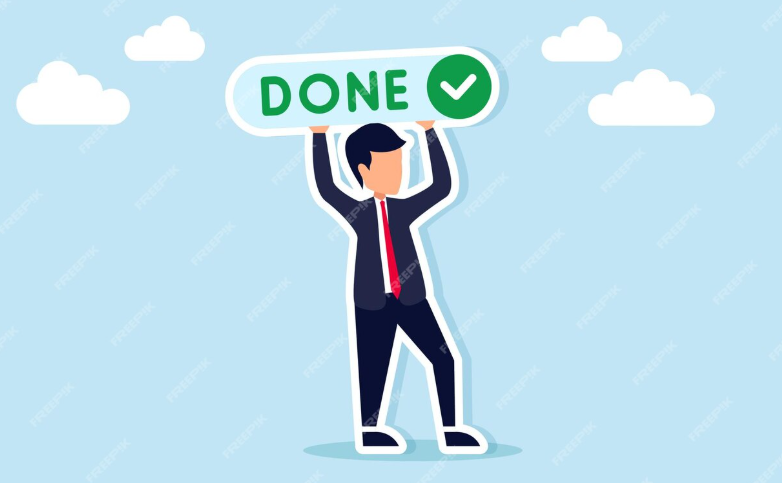